# Notebook to plot and print tables

In [1]:
# imports
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
import json
import scipy

#!pip install pycombat
import sys
from pycombat import Combat

import matplotlib.pyplot as plt
import utils as utils
import argparse
import socket
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GroupKFold
import tensorflow as tf
import models as models
import evaluation as evaluation
import traceback
import paccmann_model as paccmann_model
import joblib
import warnings
warnings.filterwarnings("ignore")

%pylab inline
%load_ext autoreload
%autoreload 2

print(socket.gethostname())

Populating the interactive namespace from numpy and matplotlib
gpu02


## Params

In [2]:
save_dir = 'results/'
#save_dir = 'results_drug_development/'
save_prefix = ''
source = 'gdsc'
targets = ['ccle','pancreas','xenografts','beat_aml']
target_number_mapping = {'ccle':[10,50,100,500,1000,5000,10000],
                         'pancreas':[10,50,100,500,10000],
                         'beat_aml':[10,50,100,500,1000,5000,10000,20000],
                         'xenografts':[10,50,10000]}

flag_normalize_descriptors = True
train_mode = 'drug_development'
use_netpop = 'ensemble'

investigate_list = ['pearson_inhib']#,'pearson_lab']#'pearson','pearson_inhib','spearman','spearman_inhib']
metric_mapping_dict = {'pearson':'Pearson correlation',
                      'pearson_inhib':'Per-inhibitor pearson correlation',
                      'spearman':'Spearman correlation',
                      'spearman_inhib':'Per-inhibitor spearman correlation',
                      'pearson_lab': 'Per-specimen pearson correlation'}

model_mapping_dict = {'nn_baseline_scratch' :'Conv NN [scratch]',
                      'nn_baseline_pretrain':'Conv NN [pre-train]',
                      'nn_paccmann_scratch' : 'PaccMann [scratch]',
                      'nn_paccmann_pretrain' :'PaccMann [pre-train]',
                      'rf':'Random Forest',
                      'tDNN_scratch': 'tDNN [scratch]',
                      'tDNN_pretrain': 'tDNN [pre-train]'}


model_names = ['nn_baseline_scratch', 'nn_baseline_pretrain', 
               'nn_paccmann_scratch', 'nn_paccmann_pretrain',
               'tDNN_scratch', 'tDNN_pretrain',
               #'rf',
              ]

investigate_list_small = ['pearson_inhib']#['pearson_inhib','pearson_lab']

# plot params
pval = 0.05 #p-value for ttest
decs = 3
invers_scale_list = [False]

cur_load_path: results/gdsc_ccle_10_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_50_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_100_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_500_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_1000_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_5000_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_ccle_10000_True_drug_development_ensemble.joblib
source: gdsc
target: ccle



################################################
#
# PRINT TABLE ONLY PEARSON
#
################################################
investigate: pearson_inhib
10 &-0.005 $\pm$ 0.021 & 0.044 $\pm$ 0.028 & -0.018 $\pm$ 0.011 & 0.1 $\pm$ 0.019* & 0.051 $\pm$ 0.025 & \textbf{0.108 $\pm$ 0.025}\\
50 &-0.019 $\pm$ 0.02 & 0.054 $\pm$ 0.029 & 0.008 $\pm$ 0.018 & 0.067 $\pm$ 0.025 & 0.058 $\pm$ 0.02 & \textbf{0.101 $\pm$ 0.024}\\
100 &0.013 $\pm$ 0.028 & 0.08 $\pm$ 0.022 & 0.01 $\pm$ 0.011 & 0.061 $\pm$ 0.024 & 0.066 $\pm$ 0.014 & \textbf{0.106 $\pm$ 0.024}\\
500 &0.043 $\pm$ 0.019 & 0.139 $\pm$ 0.018* & -0.002 $\pm$ 0.015 & 0.087 $\pm$ 0.014* & 0.126 $\pm$ 0.013 & \textbf{0.172 $\pm$ 0.018}\\
1000 &0.063 $\pm$ 0.029 & 0.158 $\pm$ 0.009* & 0.029 $\pm$ 0.009 & 0.069 $\pm$ 0.014* & 0.15 $\pm$ 0.015 & \textbf{0.174 $\pm$ 0.013}\\
5000 &0.282 $\pm$ 0.021 & 0.293 $\pm$ 0.015 & 0.237 $\pm$ 0.02 & 0.181 $\pm$ 0.016 & \textbf{0.302 $\pm$ 0.021} & 0.284 $\pm$ 0.024\\
10000 &0.29 $\pm$ 0.019 & 0.293 $\pm$ 

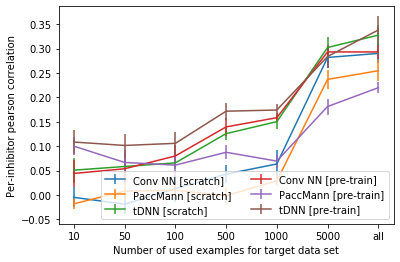

cur_load_path: results/gdsc_pancreas_10_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_pancreas_50_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_pancreas_100_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_pancreas_500_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_pancreas_10000_True_drug_development_ensemble.joblib
source: gdsc
target: pancreas



################################################
#
# PRINT TABLE ONLY PEARSON
#
################################################
investigate: pearson_inhib
10 &-0.031 $\pm$ 0.041 & -0.06 $\pm$ 0.047 & -0.033 $\pm$ 0.023 & \textbf{-0.021 $\pm$ 0.036} & -0.053 $\pm$ 0.045 & -0.042 $\pm$ 0.035\\
50 &0.002 $\pm$ 0.035 & 0.107 $\pm$ 0.034 & 0.056 $\pm$ 0.025 & 0.039 $\pm$ 0.026 & 0.108 $\pm$ 0.047 & \textbf{0.205 $\pm$ 0.039}\\
100 &-0.035 $\pm$ 0.057 & \textbf{0.241 $\pm$ 0.035*} & -0.028 $\pm$ 0.027 & 0.03 $\pm$ 0.038 & 0.181 $\pm$ 0.034 & 0.225 $\pm$ 0.036\\
500 &0.051 $\pm$ 0.046 & \textbf{0.405 $\pm$ 0.027*} & 0.003 $\pm$ 0.025 & 0.177 $\pm$ 0.039* & 0.312 $\pm$ 0.063 & 0.361 $\pm$ 0.022\\
10000 &0.282 $\pm$ 0.052 & 0.44 $\pm$ 0.022* & 0.186 $\pm$ 0.044 & 0.197 $\pm$ 0.038 & 0.422 $\pm$ 0.029 & \textbf{0.458 $\pm$ 0.031}\\
################################################
#
# PLOT FIGURE
#
################################################


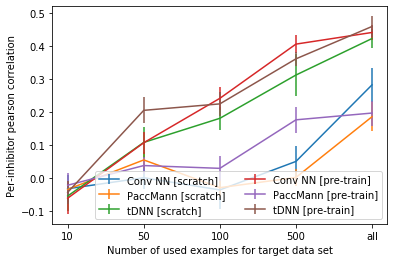

cur_load_path: results/gdsc_xenografts_10_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_xenografts_50_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_xenografts_10000_True_drug_development_ensemble.joblib
source: gdsc
target: xenografts



################################################
#
# PRINT TABLE ONLY PEARSON
#
################################################
investigate: pearson_inhib
10 &-0.078 $\pm$ 0.136 & -0.254 $\pm$ 0.093 & -0.133 $\pm$ 0.109 & \textbf{0.06 $\pm$ 0.087} & -0.389 $\pm$ 0.028 & -0.255 $\pm$ 0.042\\
50 &-0.034 $\pm$ 0.068 & -0.418 $\pm$ 0.021 & -0.171 $\pm$ 0.168 & \textbf{-0.02 $\pm$ 0.099} & -0.353 $\pm$ 0.088 & -0.451 $\pm$ 0.075\\
10000 &-0.251 $\pm$ 0.152 & -0.42 $\pm$ 0.135 & \textbf{0.077 $\pm$ 0.141} & 0.056 $\pm$ 0.098 & -0.28 $\pm$ 0.112 & -0.267 $\pm$ 0.1\\
################################################
#
# PLOT FIGURE
#
################################################


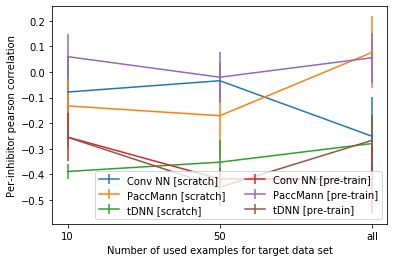

cur_load_path: results/gdsc_beat_aml_10_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_50_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_100_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_500_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_1000_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_5000_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_10000_True_drug_development_ensemble.joblib
cur_load_path: results/gdsc_beat_aml_20000_True_drug_development_ensemble.joblib
source: gdsc
target: beat_aml


In [ ]:
for target in targets:
    use_samples_list = target_number_mapping[target]
    list_use_samples = []
    all_result_dicts = []
    for use_samples in use_samples_list:
        cur_load_path = save_dir +  save_prefix + source + '_' + target + '_' + str(use_samples) +\
                '_' + str(flag_normalize_descriptors) + '_' + str(train_mode) + '_' + str(use_netpop) + '.joblib'
        print('cur_load_path: ' + cur_load_path)
        if not os.path.exists(cur_load_path):
            print('does not exist')
            continue
        cur_tmp_dict = joblib.load(cur_load_path)
        all_result_dicts.append(cur_tmp_dict)
        list_use_samples.append(use_samples)
    
    print('source: ' + str(source))
    print('target: ' + str(target))
    result_table_dict = dict()
    keys = np.arange(len(all_result_dicts))
    for j in tqdm(np.arange(len(keys))):
        cur_key = list_use_samples[j]
        if cur_key not in result_table_dict:
            result_table_dict[cur_key] = dict()
        cur_num_train_results = all_result_dicts[j]
        model_keys = model_mapping_dict.keys()
        for model_key in model_keys:
            if model_key not in result_table_dict[cur_key]:
                result_table_dict[cur_key][model_key] = dict()
            cur_model_results = cur_num_train_results[model_key]
            min_max_scaler = None
            if 'min_max_scaler' in cur_num_train_results:
                min_max_scaler = cur_num_train_results['min_max_scaler']
            tmp_res_dict = evaluation.get_metric_dict(cur_model_results['pred_complete'], cur_model_results['gt_complete'],
                                        cur_model_results['inhib_data_complete'],cur_model_results['lab_data_complete'],
                                        min_max_scaler,
                                        flag_calc_per_lab = False,
                                        flag_calc_per_inhib = True)
            tmp_res_keys = tmp_res_dict.keys()
            for key in tmp_res_keys:
                result_table_dict[cur_key][model_key][key] = tmp_res_dict[key]

    """
    print('################################################')
    print('#')
    print('# PRINT TABLE')
    print('#')
    print('################################################')
    for investigate in investigate_list:
        num_trains = result_table_dict.keys()
        for num_train in num_trains:
            cur_str = metric_mapping_dict[investigate]
            if num_train is None:
                display_number = 'all'
            else:
                display_number = str(num_train)
            cur_str += ' & ' + display_number
            cur_results = result_table_dict[num_train]        
            result_lists = []
            result_means = []
            result_strings = []
            for model in model_names:
                if model not in cur_results:
                    continue
                model_res = cur_results[model]
                cur_list = model_res[investigate + '_list']
                result_lists.append(cur_list)
                result_means.append(np.mean(cur_list))
                result_string = str(np.round(np.mean(cur_list),decimals = decs))
                if 'pretrain' in model and model.replace('pretrain','scratch') in model_names:
                    pretrain_list = cur_list
                    scratch_list = cur_results[model.replace('pretrain','scratch')][investigate + '_list']
                    if np.mean(pretrain_list) > np.mean(scratch_list):
                        # perform statistical test to compare pretrain with scratch version
                        stats,pvalue = scipy.stats.ttest_ind(pretrain_list,scratch_list)

                        if pvalue < pval:
                            result_string += '*'
                result_strings.append(result_string)
            value_arg_sort = np.argsort(result_means)[::-1]
            # perform statistical test best with second best model
            stats,pvalue = scipy.stats.ttest_ind(result_lists[value_arg_sort[0]],result_lists[value_arg_sort[1]])

            if pvalue < pval:
                result_strings[value_arg_sort[0]] += '$\dagger$'
            result_strings[value_arg_sort[0]] = '\\textbf{' + result_strings[value_arg_sort[0]] + '}'
            number_string = ' & '.join(result_strings)
            cur_str += ' &' + number_string + '\\\\'
            print(cur_str)
    """


    print('################################################')
    print('#')
    print('# PRINT TABLE ONLY PEARSON')
    print('#')
    print('################################################')    

    for investigate in investigate_list_small:
        print('investigate: ' + str(investigate))
        num_trains = result_table_dict.keys()
        for num_train in num_trains:
            cur_str = ''#metric_mapping_dict[investigate]
            if num_train is None:
                display_number = 'all'
            else:
                display_number = str(num_train)
            cur_str += display_number #' & ' + display_number
            cur_results = result_table_dict[num_train]        
            result_lists = []
            result_means = []
            restult_std_errors = []
            result_strings = []
            for model in model_names:
                if model not in cur_results:
                    continue
                model_res = cur_results[model]
                cur_list = model_res[investigate + '_list']
                result_lists.append(cur_list)
                result_means.append(np.mean(cur_list))
                restult_std_errors.append(np.std(cur_list) / np.sqrt(len(cur_list)))
                result_string = str(np.round(np.mean(cur_list),decimals = decs)) +\
                            ' $\pm$ ' + str(np.round(np.std(cur_list) / np.sqrt(len(cur_list)),decimals = decs))
                if 'pretrain' in model and model.replace('pretrain','scratch') in model_names:
                    pretrain_list = cur_list
                    scratch_list = cur_results[model.replace('pretrain','scratch')][investigate + '_list']
                    if np.mean(pretrain_list) > np.mean(scratch_list):
                        # perform statistical test to compare pretrain with scratch version
                        stats,pvalue = scipy.stats.ttest_ind(pretrain_list,scratch_list)

                        if pvalue < pval:
                            result_string += '*'
                result_strings.append(result_string)
            value_arg_sort = np.argsort(result_means)[::-1]
            # perform statistical test best with second best model
            stats,pvalue = scipy.stats.ttest_ind(result_lists[value_arg_sort[0]],result_lists[value_arg_sort[1]])

            if pvalue < pval:
                result_strings[value_arg_sort[0]] += '$\dagger$'
            result_strings[value_arg_sort[0]] = '\\textbf{' + result_strings[value_arg_sort[0]] + '}'
            number_string = ' & '.join(result_strings)
            cur_str += ' &' + number_string + '\\\\'
            print(cur_str)
    
    """
    print('################################################')
    print('#')
    print('# PRINT TABLE ONLY MSE')
    print('#')
    print('################################################')    

    mse_list = ['MSE','MSE_lab','MSE_inhib']
    for investigate in mse_list:
        print('investigate: ' + str(investigate))
        num_trains = result_table_dict.keys()
        for num_train in num_trains:
            cur_str = ''#metric_mapping_dict[investigate]
            if num_train is None:
                display_number = 'all'
            else:
                display_number = str(num_train)
            cur_str += display_number #' & ' + display_number
            cur_results = result_table_dict[num_train]        
            result_lists = []
            result_means = []
            restult_std_errors = []
            result_strings = []
            for model in model_names:
                if model not in cur_results:
                    continue
                model_res = cur_results[model]
                cur_list = model_res[investigate + '_list']
                result_lists.append(cur_list)
                result_means.append(np.mean(cur_list))
                restult_std_errors.append(np.std(cur_list) / np.sqrt(len(cur_list)))
                result_string = str(np.round(np.mean(cur_list),decimals = decs)) +\
                            ' $\pm$ ' + str(np.round(np.std(cur_list) / np.sqrt(len(cur_list)),decimals = decs))
                if 'pretrain' in model and model.replace('pretrain','scratch') in model_names:
                    pretrain_list = cur_list
                    scratch_list = cur_results[model.replace('pretrain','scratch')][investigate + '_list']
                    if np.mean(pretrain_list) > np.mean(scratch_list):
                        # perform statistical test to compare pretrain with scratch version
                        stats,pvalue = scipy.stats.ttest_ind(pretrain_list,scratch_list)

                        if pvalue < pval:
                            result_string += '*'
                result_strings.append(result_string)
            value_arg_sort = np.argsort(result_means)[::-1]
            # perform statistical test best with second best model
            stats,pvalue = scipy.stats.ttest_ind(result_lists[value_arg_sort[0]],result_lists[value_arg_sort[1]])

            if pvalue < pval:
                result_strings[value_arg_sort[0]] += '$\dagger$'
            result_strings[value_arg_sort[0]] = '\\textbf{' + result_strings[value_arg_sort[0]] + '}'
            number_string = ' & '.join(result_strings)
            cur_str += ' &' + number_string + '\\\\'
            print(cur_str)
    """
    
    print('################################################')
    print('#')
    print('# PLOT FIGURE')
    print('#')
    print('################################################')
    
    use_model_names = ['nn_baseline_scratch',                 
                 'nn_paccmann_scratch',
                 'tDNN_scratch',
                 'nn_baseline_pretrain',
                 'nn_paccmann_pretrain',                
                 'tDNN_pretrain']
    for investigate in investigate_list:
        fig_filename = 'plots/' + train_mode + '_'+ target + '_' + investigate + '.pdf'
        for model_name in use_model_names:
            if model_name not in result_table_dict[list(num_trains)[0]]:
                continue
            display_name = model_mapping_dict[model_name]
            mean_vals = []
            std_err_vals = []
            key_vals = []
            for num_train in num_trains:
                cur_vals = result_table_dict[num_train][model_name][investigate + '_list']
                mean_vals.append(np.mean(cur_vals))
                std_err_vals.append(np.std(cur_vals) / np.sqrt(len(cur_vals)))
                display_key = num_train
                if display_key == list(num_trains)[-1]:
                    display_key = 'all'
                key_vals.append(display_key)
            plt.errorbar(np.arange(len(num_trains)),mean_vals,std_err_vals,label=display_name)

        plt.xticks(np.arange(len(num_trains)),key_vals)
        plt.xlabel('Number of used examples for target data set')
        plt.ylabel(metric_mapping_dict[investigate]) 
        plt.legend(ncol=2,loc=4)
        plt.savefig(fig_filename)
        plt.show()

In [ ]:
len(all_result_dicts)

In [ ]:
len(all_result_dicts[0]['tDNN_scratch']['inhib_data_complete'])

In [ ]:
np.unique(all_result_dicts[0]['tDNN_scratch']['inhib_data_complete'][0])

In [ ]:
np.unique(all_result_dicts[0]['tDNN_scratch']['inhib_data_complete'][1])

In [ ]:
print(len(np.unique(all_result_dicts[0]['tDNN_scratch']['lab_data_complete'][0])))
print(len(np.unique(all_result_dicts[0]['tDNN_scratch']['lab_data_complete'][1])))

In [ ]:
all_result_dicts[0]['tDNN_scratch']['gt_complete'][0]

In [ ]:
all_result_dicts[0]['tDNN_scratch']['pred_complete'][0]

In [ ]:
plt.plot(all_result_dicts[-1]['tDNN_scratch']['gt_complete'][0],all_result_dicts[-1]['tDNN_scratch']['pred_complete'][0].flatten(),'rx')

In [ ]:
len(all_result_dicts[-1]['tDNN_scratch']['gt_complete'])

In [ ]:
all_result_dicts[-1]['tDNN_scratch'].keys()

In [ ]:
all_result_dicts[-1]['tDNN_scratch']['lab_data_complete']

In [ ]:
import scipy

labs = all_result_dicts[-1]['tDNN_scratch']['lab_data_complete'][0]
gt = all_result_dicts[-1]['tDNN_scratch']['gt_complete'][0]
pred = all_result_dicts[-1]['tDNN_scratch']['pred_complete'][0]
inhibs = all_result_dicts[-1]['tDNN_scratch']['inhib_data_complete'][0]
unique_labs = list(np.unique(labs))
pearsons = []
for i in range(len(unique_labs)):
    cur_ids = np.where(labs == unique_labs[i])[0]
    #plt.plot(gt[cur_ids],pred[cur_ids],'rx')
    print('number of drugs: ' + str(len(np.unique(inhibs[cur_ids]))))
    pearson,_ = scipy.stats.pearsonr(gt[cur_ids],pred[cur_ids].flatten())
    print('pearson: ' + str(pearson))
    pearsons.append(pearson)


In [ ]:
pe=float(pd.DataFrame(gt[cur_ids]).corrwith(pd.DataFrame(pred[cur_ids]), drop=True,method='pearson' , axis=0))
pe

In [ ]:
all_result_dicts[0]['tDNN_scratch'].keys()